# Importing required libraries

In [78]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [59]:
insurancedf=pd.read_csv("/content/insurance.csv")
insurancedf.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Preprocessing the data

In [60]:
#checking for null values
insurancedf.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [61]:
#checking for duplicates
print('total no. of duplicates: ',insurancedf.duplicated().sum())
#dropping duplicates
new_insurancedf= insurancedf.drop_duplicates(keep='first')
print('total no. of duplicates in new dataframe: ',new_insurancedf.duplicated().sum())

total no. of duplicates:  1
total no. of duplicates in new dataframe:  0


In [62]:
#there are three categorical variables which can be converted using encoding 
le = LabelEncoder()
le.fit(new_insurancedf.sex)
new_insurancedf.sex=le.transform(new_insurancedf.sex )
# smoker 
le.fit(new_insurancedf.smoker)
new_insurancedf.smoker=le.transform(new_insurancedf.smoker )
# region 
le.fit(new_insurancedf.region)
new_insurancedf.region=le.transform(new_insurancedf.region )


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


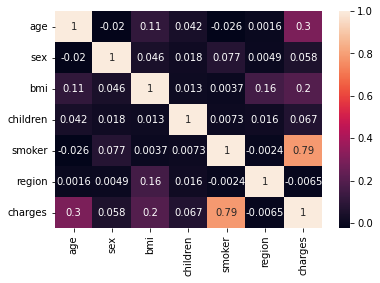

In [63]:
ax = sns.heatmap(new_insurancedf.corr(),annot=True)

From the given heatmap we can see that the correlation of chargers with smoker, bmi and age is prominent 

In [65]:
#dropping the region column from the dataframe
new_insurancedf=new_insurancedf.drop(['region'],axis=1)

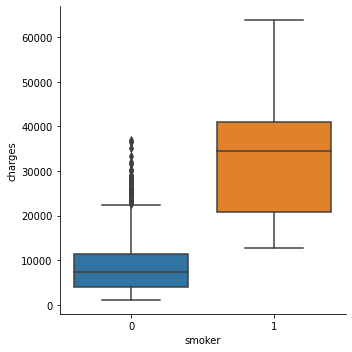

In [66]:
sns.catplot(x="smoker",y="charges",data=new_insurancedf,kind="box")

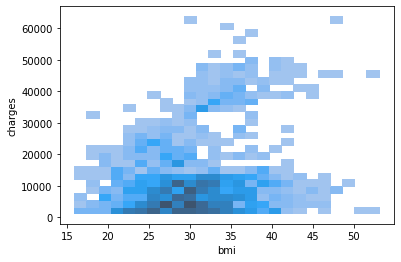

In [73]:
sns.histplot(x="bmi", y='charges' , data=new_insurancedf)

Splitting the target and features

In [67]:
y=new_insurancedf['charges']
x=new_insurancedf.iloc[:,:-1]

training set and testing set

In [68]:
x_train, x_test, y_train,y_test=train_test_split(x,y,test_size=0.2)

# Model training 

In [69]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [70]:
predictions= model.predict(x_test)
scores =r2_score(y_test,predictions)

#Visualizing the regression

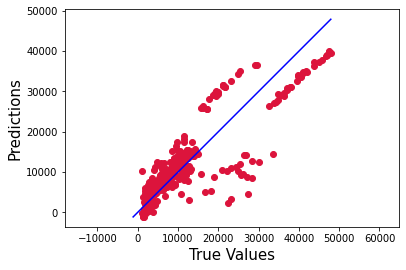

In [82]:
plt.scatter(y_test, predictions, c='crimson')


p1 = max(max(predictions), max(y_test))
p2 = min(min(predictions), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-') #perfect regression 
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

# Model Score

In [71]:
print('Model used: ',model)
print('R2 score of model= ',scores)

Model used:  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
R2 score of model=  0.7229861073743131
